In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

**Fake Data**

In [2]:
docs = [
    "it is a good day, I like to stay here",
    "I am happy to be here",
    "I am bob",
    "it is sunny today",
    "I have a party today",
    "it is a dog and that is a cat",
    "there are dog and cat on the tree",
    "I study hard this morning",
    "today is a good day",
    "tomorrow will be a good day",
    "I like coffee, I like book and I like apple",
    "I do not like it",
    "I am kitty, I like bob",
    "I do not care who like bob, but I like kitty",
    "It is coffee time, bring your cup",
]

**Model with Sklearn**

In [4]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("v2i: ", vectorizer.vocabulary_)

idf:  [('am', 2.386294361119891), ('and', 2.386294361119891), ('apple', 3.0794415416798357), ('are', 3.0794415416798357), ('be', 2.6739764335716716), ('bob', 2.386294361119891), ('book', 3.0794415416798357), ('bring', 3.0794415416798357), ('but', 3.0794415416798357), ('care', 3.0794415416798357), ('cat', 2.6739764335716716), ('coffee', 2.6739764335716716), ('cup', 3.0794415416798357), ('day', 2.386294361119891), ('do', 2.6739764335716716), ('dog', 2.6739764335716716), ('good', 2.386294361119891), ('happy', 3.0794415416798357), ('hard', 3.0794415416798357), ('have', 3.0794415416798357), ('here', 2.6739764335716716), ('is', 1.9808292530117262), ('it', 1.9808292530117262), ('kitty', 2.6739764335716716), ('like', 1.9808292530117262), ('morning', 3.0794415416798357), ('not', 2.6739764335716716), ('on', 3.0794415416798357), ('party', 3.0794415416798357), ('stay', 3.0794415416798357), ('study', 3.0794415416798357), ('sunny', 3.0794415416798357), ('that', 3.0794415416798357), ('the', 3.0794415

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
q = "I get a coffee cup"
qtf_idf = vectorizer.transform([q])
res = cosine_similarity(tf_idf, qtf_idf)
res = res.ravel().argsort()[-3:]
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in res[::-1]]))


top 3 docs for 'I get a coffee cup':
['It is coffee time, bring your cup', 'I like coffee, I like book and I like apple', 'I do not care who like bob, but I like kitty']


**Graph**

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def show_tfidf(tfidf, vocab, filename):
    # [n_doc, n_vocab]
    plt.imshow(tfidf, cmap="YlGn", vmin=tfidf.min(), vmax=tfidf.max())
    plt.xticks(np.arange(tfidf.shape[1]), vocab, fontsize=6, rotation=90)
    plt.yticks(np.arange(tfidf.shape[0]), np.arange(1, tfidf.shape[0]+1), fontsize=6)
    plt.tight_layout()
    plt.show()

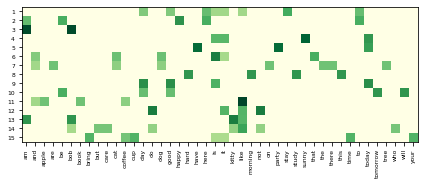

In [21]:
i2v = {i: v for v, i in vectorizer.vocabulary_.items()}
dense_tfidf = tf_idf.todense()
show_tfidf(dense_tfidf, [i2v[i] for i in range(dense_tfidf.shape[1])], "tfidf_sklearn_matrix")